In [1]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [2]:
# load data
train_data = np.loadtxt(open("landsat_train.csv","rb"),delimiter=",")
validation_data = np.loadtxt(open("landsat_validation.csv","rb"),delimiter=",")
area_data = np.loadtxt(open("landsat_area.csv","rb"),delimiter=",")

print(train_data.shape)
print(validation_data.shape)
print(area_data.shape)

(5000000, 10)
(1335558, 10)
(9000000, 9)


In [3]:
def splitData(data):
    label = data[:,0]
    inputs = data[:,1:]
    return inputs, label

# split data
train_features, train_label = splitData(train_data)
validation_features, validation_label = splitData(validation_data)

In [6]:
# train the random forest model
rf = RandomForestClassifier(n_estimators=10, bootstrap=True, criterion='gini',max_depth=None)
rf.fit(train_features,train_label)

validation_accuracy = rf.score(validation_features, validation_label)
print("the validation accuracy is {}%".format(validation_accuracy * 100))

the validation accuracy is 74.86204268178544%


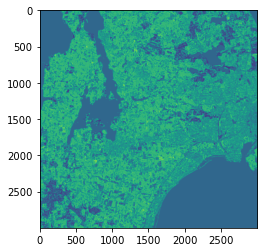

In [5]:
prediction = rf.predict(area_data)
prediction = np.reshape(prediction, (3000,3000))

plt.imshow(prediction)